#**Start by importing the needed libraries for our Project**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

#**Read the data and Explore it and Ask Questions**

In [64]:
df = pd.read_csv('diabetes.csv')

In [65]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


##**Column Description :**
Pregnancies

Type: Integer

Meaning: Number of times the patient has been pregnant.

Role: Risk factor – higher pregnancies may correlate with higher diabetes risk.

Glucose

Type: Integer (mg/dL)

Meaning: Plasma glucose concentration from an oral glucose tolerance test.

Role: Major indicator – high glucose levels are strongly associated with diabetes.

BloodPressure

Type: Integer (mmHg)

Meaning: Diastolic blood pressure (the bottom value in blood pressure readings).

Role: Hypertension is often linked with diabetes.

SkinThickness

Type: Integer (mm)

Meaning: Triceps skinfold thickness – an indirect measure of body fat.

Role: Used as an obesity indicator. Missing values often appear as 0.

Insulin

Type: Integer (mu U/ml)

Meaning: 2-hour serum insulin level after glucose ingestion.

Role: Important but often noisy; 0 usually means missing/not measured.

BMI (Body Mass Index)

Type: Float (kg/m²)

Meaning: Weight in kg / (height in m)².

Role: Obesity is a major diabetes risk factor.

DiabetesPedigreeFunction (DPF)

Type: Float

Meaning: A score summarizing diabetes history in the family and genetic influence.

Role: Higher DPF indicates stronger genetic predisposition.

Age

Type: Integer (years)

Meaning: Patient’s age.

Role: Older age generally increases diabetes risk.

Outcome

Type: Binary (0 or 1)

Meaning: Target variable.

0 = No diabetes
1 = Diabetes present

##**Describing our data to see its statstical overview**

In [67]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##**For this describe we notice that :**
Pregnancies

Range: 0 to 17, with median = 3.

Most women had between 1 and 6 pregnancies, but some had many more, which could indicate outliers.

Glucose

Mean ≈ 121, median = 117.

Min = 0, which is unrealistic → indicates missing or unrecorded values coded as 0.

High glucose values are present (up to 199), consistent with diabetic cases.

BloodPressure

Mean ≈ 69 mmHg, but min = 0, which is biologically invalid.

Suggests missing values coded as 0.

SkinThickness

Mean ≈ 20 mm, median = 23, but many zeros (25th percentile = 0) → strong evidence of missing data.

Max = 99 mm → likely outliers or extreme measurements.

Insulin

Mean ≈ 80, but very high standard deviation (115) and max = 846 → highly skewed with extreme outliers.

Many zeros (25th percentile = 0) → missing data.

BMI

Mean ≈ 32, median = 32, reasonable distribution.

Some zero values exist, which are invalid and indicate missing entries.

Diabetes Pedigree Function (DPF)

Mean ≈ 0.47, range from 0.078 to 2.42.

Appears correctly distributed, no invalid values.

Age

Mean ≈ 33 years, range 21 to 81.

Most patients are young adults (25–40 years), but there are older participants as well.

Outcome

Distribution: Mean = 0.35 → about 35% diabetic, 65% non-diabetic.

This indicates class imbalance that should be handled in modeling.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###**From this info we conclude that all dataypes are ready to use (numerical ones) No need to perform any type of encoding during the preprocessing**

##**Visualize frequncies and realtionships in our features**

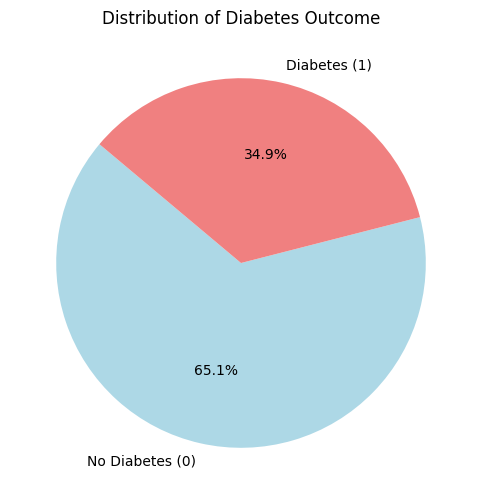

In [69]:
outcome_counts = df['Outcome'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=['No Diabetes (0)', 'Diabetes (1)'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Diabetes Outcome')
plt.show()

###**This indacites class imblanace in our outcomes column in which could be handled through diff approaches:**
1- Smote - Under Sampling - oversampling

2- Powerful models as (XGBOOST,LighGbm) Handles this part automatically during train

3- using class-weight = 'balanced' this make it penalizes errors for diabetecs more during training

4- Evalution metrics no just use approach of accuracy use precision and recall and f1 that could help in identefying your model performance during training

###**visualize te realtionship between glucose Levels and the outcomes**

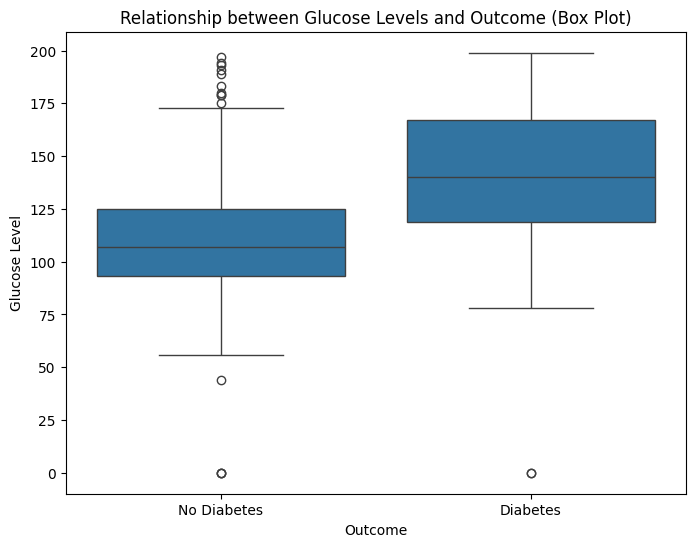

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Relationship between Glucose Levels and Outcome (Box Plot)')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.xlabel('Outcome')
plt.ylabel('Glucose Level')
plt.show()

####**From this box plt we conclude that there are postive realtionship between both of them as if the glucose level in the blood increase the outcome of having diabetes is much higher**
Conclusions from the Boxplot

Median Glucose is Higher in Diabetic Patients

Non-diabetic median ≈ 105–110 mg/dL.

Diabetic median ≈ 140 mg/dL.
👉 Clear upward shift → diabetics generally have higher glucose levels.

Distribution Spread

Non-diabetics: Glucose mostly between 90–125.

Diabetics: Glucose mostly between 120–170.
👉 Strong separation between groups, though some overlap exists.

Outliers

Both groups show extreme glucose values (close to 0, up to ~200).

Glucose = 0 is biologically invalid → indicates missing data recorded as 0.

Many outliers above 175 in non-diabetics → possible data variability or mislabels.

Group Comparison

Diabetics consistently show higher glucose across the IQR (interquartile range).

Non-diabetics have a wider spread and more low-end outliers.

Key Insight

Glucose is a strong predictor of diabetes in this dataset:

Higher glucose → much higher likelihood of diabetes.

However, since there is overlap, glucose alone cannot perfectly separate the classes → we need other features (like BMI, Age, Insulin).

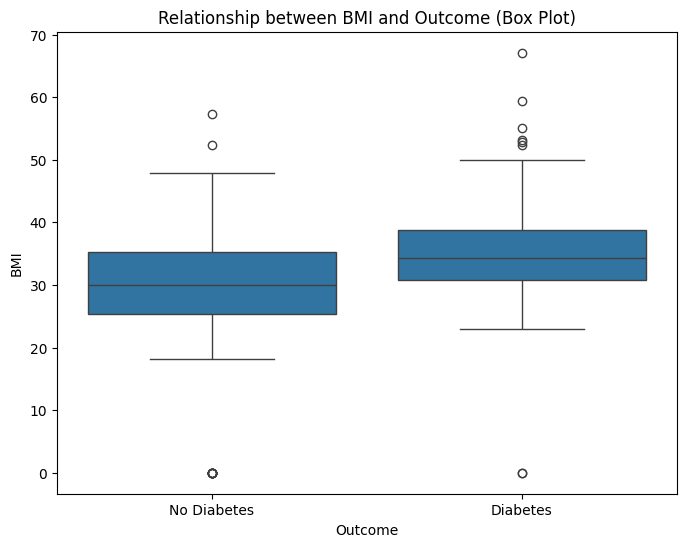

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('Relationship between BMI and Outcome (Box Plot)')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()

####**From this we conclude that:**

Median BMI is Higher in Diabetic Patients

Non-diabetic median ≈ 29–30

Diabetic median ≈ 34–35
👉 Suggests that diabetic patients tend to have higher BMI than non-diabetic ones.

Distribution Spread

Non-diabetics: BMI mostly between 25–35.

Diabetics: BMI mostly between 30–40.
👉 Diabetics cluster at a higher BMI range overall.

Outliers

Both groups have very high BMI values (>50, even up to ~68).

Some BMI = 0 values → biologically impossible → these are missing data placeholders and should be cleaned.

Group Comparison

The entire distribution of BMI for diabetics is shifted upwards compared to non-diabetics.

There is still overlap → not all patients with high BMI have diabetes, but high BMI increases risk.

Key Insight

BMI is a contributing factor to diabetes: higher BMI is associated with higher diabetes risk.

However, since the distributions overlap, BMI alone is not enough to perfectly separate diabetics from non-diabetics → it should be combined with other features (like Glucose, Age, Insulin) in prediction models.

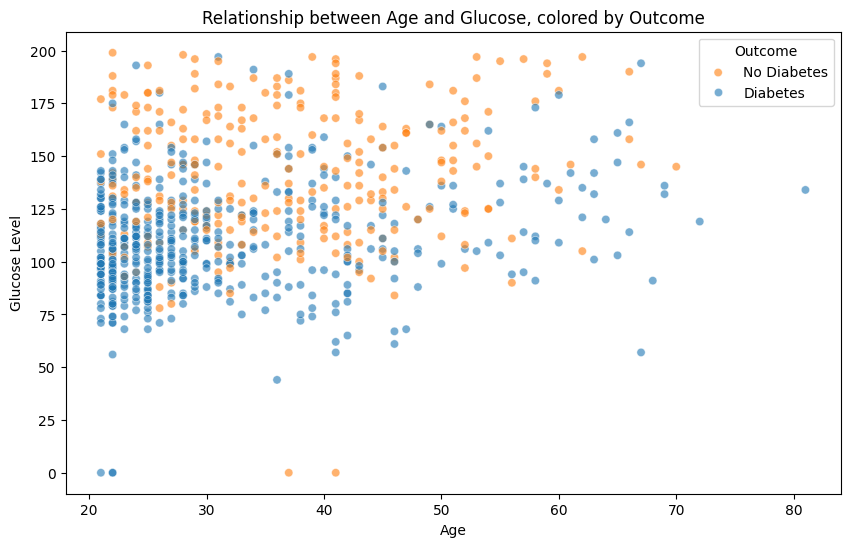

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df, alpha=0.6)
plt.title('Relationship between Age and Glucose, colored by Outcome')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

####**From this scatter plot, we can conclude the following:**

*   **Higher Glucose levels are strongly associated with Diabetes:** Regardless of age, individuals with higher glucose levels are more likely to have a diabetes outcome (indicated by the orange points). There is a clear clustering of diabetic cases (orange) in the upper regions of the plot (higher glucose values).
*   **Age plays a role, especially with higher Glucose:** While high glucose is a key indicator, there seems to be a higher concentration of diabetic individuals (orange points) among older patients (towards the right side of the plot), particularly at elevated glucose levels. Younger individuals with diabetes still tend to have higher glucose, but the density of diabetic cases appears to increase with age when glucose is also high.
*   **Overlap exists:** There is an overlap between the two outcome groups, especially in the lower-to-mid range of glucose levels. This means that some individuals without diabetes can have relatively high glucose, and some with diabetes might have moderate glucose, highlighting the need for other features to make accurate predictions.
*   **Zero Glucose values:** The scatter plot also clearly shows points at Glucose = 0 for both outcomes. As noted before, these are biologically impossible and represent missing data that needs to be handled.

In summary, the plot reinforces that Glucose is a primary predictor, and Age is an important contributing factor, with the combination of higher Glucose and older Age increasing the likelihood of a diabetes diagnosis.

#**Preparing our dataset**

##**Preprocessing our data**

###**Checking for nulls**

In [73]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


###**Checking for duplicates**

In [74]:
df.duplicated().sum()

np.int64(0)

###**Handling outliers**

In [75]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    df = handle_outliers_iqr(df, col)

print("Outliers handled using IQR method.")

Outliers handled using IQR method.


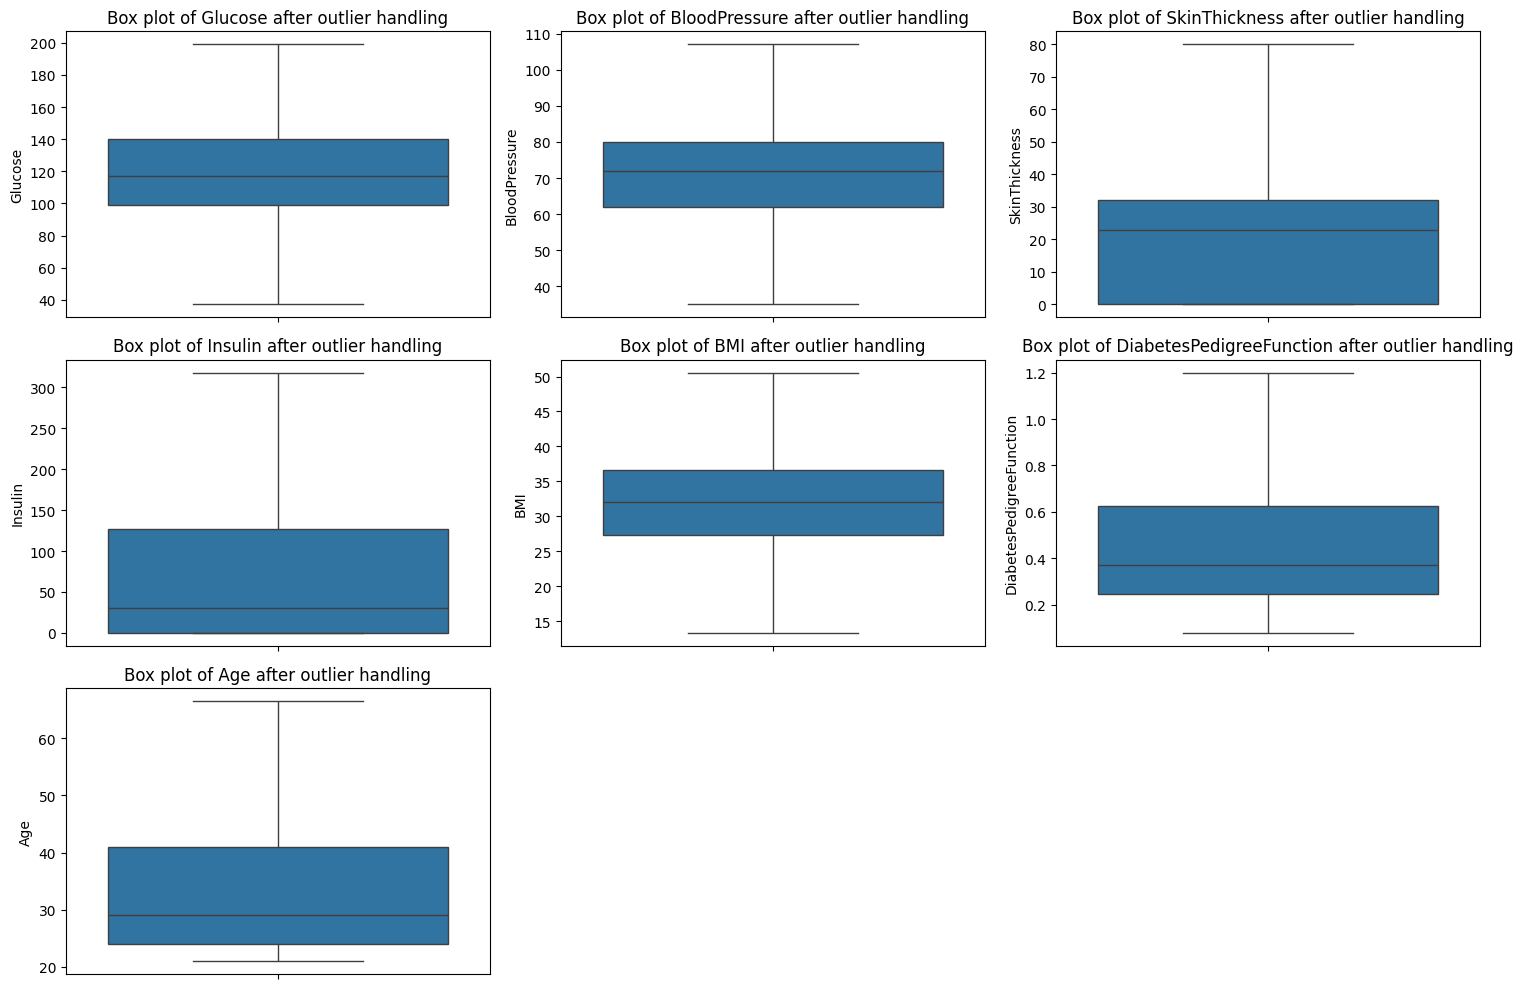

In [76]:
cols_to_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col} after outlier handling')
plt.tight_layout()
plt.show()

####**From this we conclude that all outliers are handled in our data**

##**Feature selection using mutual info class to capture non linear realtionships**

In [77]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

mi_scores = mutual_info_classif(x, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)

Glucose                     0.107517
BMI                         0.083680
Age                         0.065197
Insulin                     0.054479
Pregnancies                 0.047817
DiabetesPedigreeFunction    0.016779
BloodPressure               0.015579
SkinThickness               0.006822
Name: MI Scores, dtype: float64


####**From this we will defentily use Glucose , BMI , Age columns in our x train**

##**Splitting our data**

In [78]:
x = df[['Glucose', 'BMI', 'Age']]
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##**Applying Scaling to our dataset**

In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

##**Applying Smote to our dataset**

In [80]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", x_train.shape, y_train.value_counts().to_dict())
print("After SMOTE :", X_train_res.shape, y_train_res.value_counts().to_dict())

Before SMOTE: (614, 3) {0: 401, 1: 213}
After SMOTE : (802, 3) {0: 401, 1: 401}


#**Modeling**

##**SVM**

In [81]:
svc = SVC(probability=True, random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(svc, param_grid, refit=True, cv=5, scoring='f1')
grid.fit(X_train_res, y_train_res)
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)
best_svc = grid.best_estimator_
y_pred = best_svc.predict(X_test_scaled)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best CV Score: 0.8073279301713792


###**Compute the accuracy**

In [82]:
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78        99
           1       0.60      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.73      0.74       154



##**Svm model yeild a very good f1 score bec of the high precision and recall values and accuracy of 73% which is good for a small dataset so will the random forest get higher accuracy and f1 score?**

##**Random forest**

In [83]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_res, y_train_res)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.8164692033113085


##**print the model accuracy**

In [84]:
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.78        99
           1       0.61      0.75      0.67        55

    accuracy                           0.74       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.74      0.74       154



##**Xgboost**

In [85]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1, 0.2]
}
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train_res, y_train_res)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best CV Score: 0.8187531625619128


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:19:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


###**Classfication report for XGBOOST**

In [86]:
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76        99
           1       0.57      0.67      0.62        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.70      0.71       154



##**Trying stacking diffrent models**

In [87]:
rf_best = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

xgb_best = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    colsample_bytree=1,
    gamma=0.1,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=100,
    subsample=0.8,
    random_state=42
)

svc_best = SVC(
    C=100,
    gamma=1,
    kernel='rbf',
    probability=True,
    random_state=42
)

meta_model = LogisticRegression(max_iter=1000, random_state=42)

stacking = StackingClassifier(
    estimators=[('rf', rf_best), ('xgb', xgb_best), ('svc', svc_best)],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

stacking.fit(X_train_res, y_train_res)

y_pred = stacking.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[73 26]
 [16 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        99
           1       0.60      0.71      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



## Conclusion on Model Performance

Based on the classification reports for the SVM, Random Forest, and XGBoost models and stacking model:

Considering the class imbalance (more non-diabetic cases than diabetic cases), the F1-score is a more reliable metric than accuracy for evaluating the models' performance on the minority class (diabetes).


Based on the F1-score for the diabetic class and overall performance metrics, the **Random Forest** appears to be the best performing model among the three for this dataset. It demonstrates a better balance between precision and recall in identifying diabetes cases, which is crucial in a medical context.

While RandomForest is the best among the tested models, further tuning, exploring other models, or additional data preprocessing steps could potentially improve the performance even further.

#**Make a function for predicting diabetes for new patients**

In [88]:
def predict_diabetes(glucose, bmi, age):
    new_patient_data = pd.DataFrame([[glucose, bmi, age]], columns=['Glucose', 'BMI', 'Age'])
    scaled_patient_data = scaler.transform(new_patient_data)

    prediction = best_rf.predict(scaled_patient_data)

    if prediction[0] == 1:
        return "Diabetic"
    else:
        return "Non-Diabetic"